# FULL DISCLOSURE, HEAVY GPT USE IN THIS FILE.  
### I NEED ALL EYES ON THIS TO VALIDATE PROCESS AND FIND MISTAKES / MISLEADS


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a local file after downloading it
df = pd.read_csv("data/marketing_campaign.csv",sep='\t')

### This only works for about 50% of the data. The other dates are turned into NaT aka NULLs
df['dt'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

# Lots of unimportant marital status, 
# Keep only ones that have more than 50 rows. 
marital_status_to_keep = df.Marital_Status.value_counts()[df.Marital_Status.value_counts() > 50].index.values
marital_status_to_keep = ['Married', 'Together', 'Single', 'Divorced', 'Widow']

df = df[df.Marital_Status.isin(marital_status_to_keep)].copy()

# Dummify the data.  
# Turns Education and Martial_Status into numerical values. 
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)




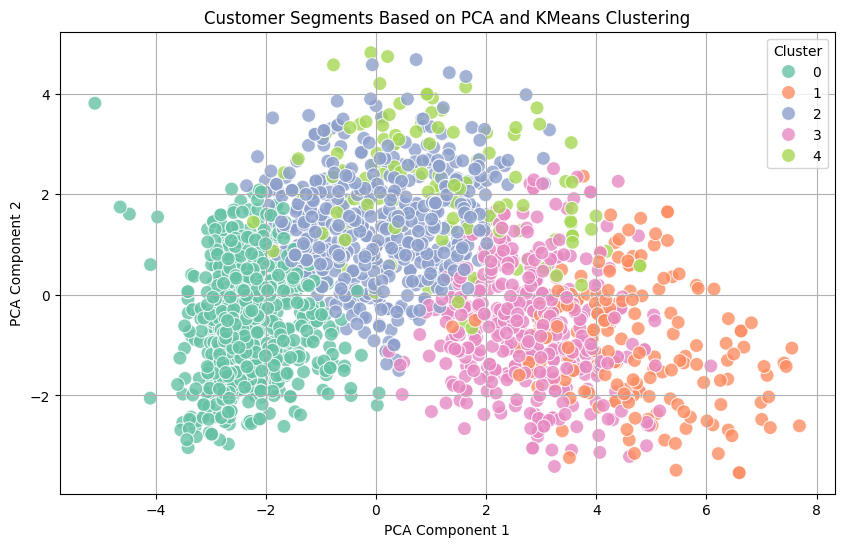

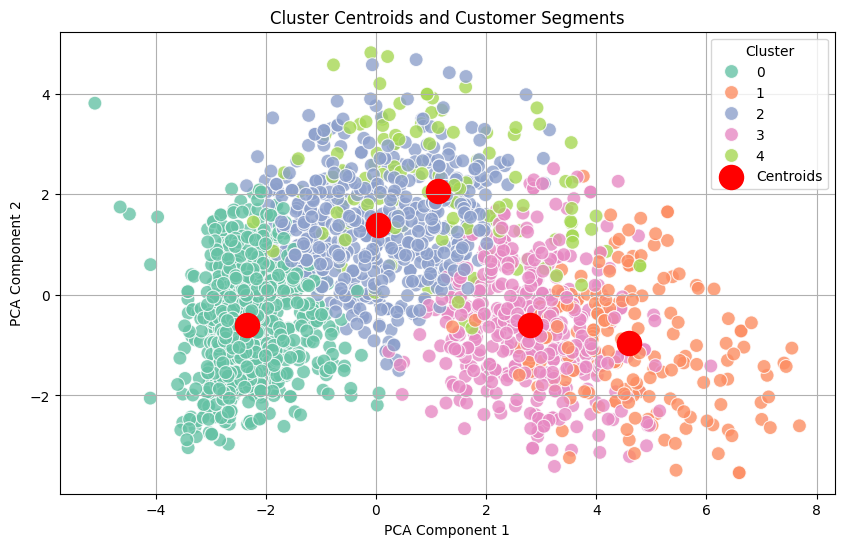

          Year_Birth        Income   Kidhome  Teenhome    Recency    MntWines  \
Cluster                                                                         
0        1972.574173  33507.278549  0.833511  0.404482  49.229456   33.590181   
1        1968.636364  85174.540107  0.048128  0.069519  47.994652  780.786096   
2        1963.669742  55700.889299  0.263838  0.933579  48.001845  378.666052   
3        1968.137116  71930.338061  0.059102  0.300236  49.494090  491.803783   
4        1965.191667  62221.441667  0.150000  0.758333  52.941667  695.191667   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
Cluster                                                                 ...   
0         4.753469        21.312700         6.915688          4.894344  ...   
1        63.122995       505.962567        95.465241         72.689840  ...   
2        17.378229       118.579336        25.416974         18.046125  ...   
3        72.872340       411.314421  

In [2]:

# Preprocessing: Drop irrelevant columns and handle missing data
df = df.drop(columns=['ID', 'dt','Dt_Customer', 'Z_CostContact', 'Z_Revenue'])
df = df.dropna()

# Normalize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Use PCA for dimensionality reduction to 2D (for visualization)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Calculate silhouette score
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])

# Visualization of clusters in 2D using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='Set2', s=100, alpha=0.8)
plt.title('Customer Segments Based on PCA and KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Visualize centroids
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='Set2', s=100, alpha=0.8)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c='red', label='Centroids')
plt.title('Cluster Centroids and Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Display cluster characteristics
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)

# Silhouette score for evaluating cluster quality
print(f"Silhouette Score: {silhouette_avg:.2f}")


<Axes: ylabel='count'>

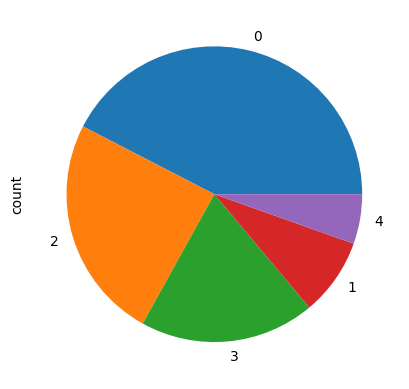

In [3]:
# product_columns = 
df.Cluster.value_counts().plot.pie()



In [4]:
# Display cluster characteristics by taking the mean of each feature for each cluster
cluster_summary = df.groupby('Cluster').mean()

# Print the summary for stakeholders
for cluster in cluster_summary.index:
    print(f"\n### Cluster {cluster} Characteristics ###")
    
    # Extract the row for the current cluster
    cluster_data = cluster_summary.loc[cluster]

    raw_cluster_df = df[df.Cluster == cluster]
    
    # Highlight key features for each cluster
    print(f"- Size of Cluster: {len(raw_cluster_df)}")
    print(f"- Average Income: ${cluster_data['Income']:.2f}")
    print(f"- Average Age: {2024 - cluster_data['Year_Birth']:.0f}")
    print(f"- Average spending on Wine: ${cluster_data['MntWines']:.2f}")
    print(f"- Average spending on Fruits: ${cluster_data['MntFruits']:.2f}")
    print(f"- Average spending on Meat: ${cluster_data['MntMeatProducts']:.2f}")
    print(f"- Average spending on Fish: ${cluster_data['MntFishProducts']:.2f}")
    print(f"- Average spending on Sweet Products: ${cluster_data['MntSweetProducts']:.2f}")
    print(f"- Average spending on Gold Products: ${cluster_data['MntGoldProds']:.2f}")
    print(f"- Number of Children: {cluster_data['Kidhome'] + cluster_data['Teenhome']:.0f}")
    
    # Include more characteristics based on the dataset
    print(f"- Number of Accepted Campaigns: {cluster_data['AcceptedCmp1'] + cluster_data['AcceptedCmp2'] + cluster_data['AcceptedCmp3'] + cluster_data['AcceptedCmp4'] + cluster_data['AcceptedCmp5']:.0f}")



### Cluster 0 Characteristics ###
- Size of Cluster: 937
- Average Income: $33507.28
- Average Age: 51
- Average spending on Wine: $33.59
- Average spending on Fruits: $4.75
- Average spending on Meat: $21.31
- Average spending on Fish: $6.92
- Average spending on Sweet Products: $4.89
- Average spending on Gold Products: $14.64
- Number of Children: 1
- Number of Accepted Campaigns: 0

### Cluster 1 Characteristics ###
- Size of Cluster: 187
- Average Income: $85174.54
- Average Age: 55
- Average spending on Wine: $780.79
- Average spending on Fruits: $63.12
- Average spending on Meat: $505.96
- Average spending on Fish: $95.47
- Average spending on Sweet Products: $72.69
- Average spending on Gold Products: $83.18
- Number of Children: 0
- Number of Accepted Campaigns: 2

### Cluster 2 Characteristics ###
- Size of Cluster: 542
- Average Income: $55700.89
- Average Age: 60
- Average spending on Wine: $378.67
- Average spending on Fruits: $17.38
- Average spending on Meat: $118.58
- 

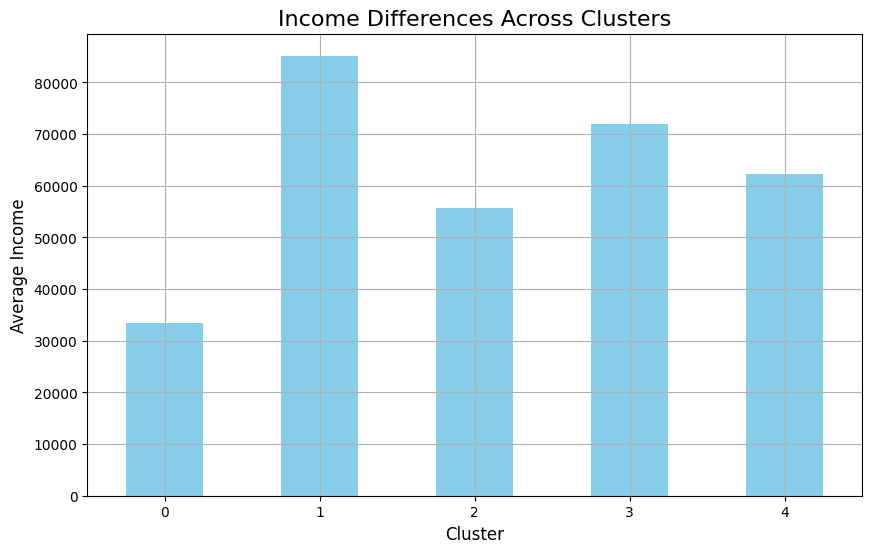

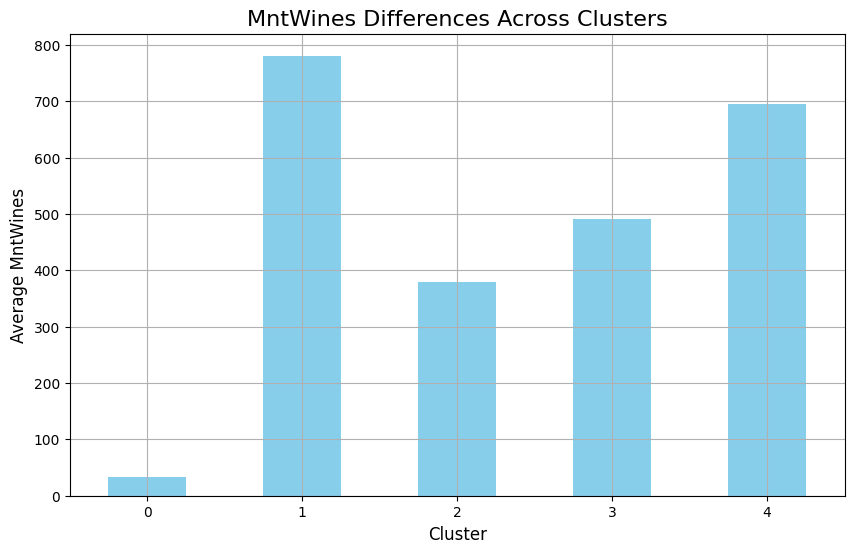

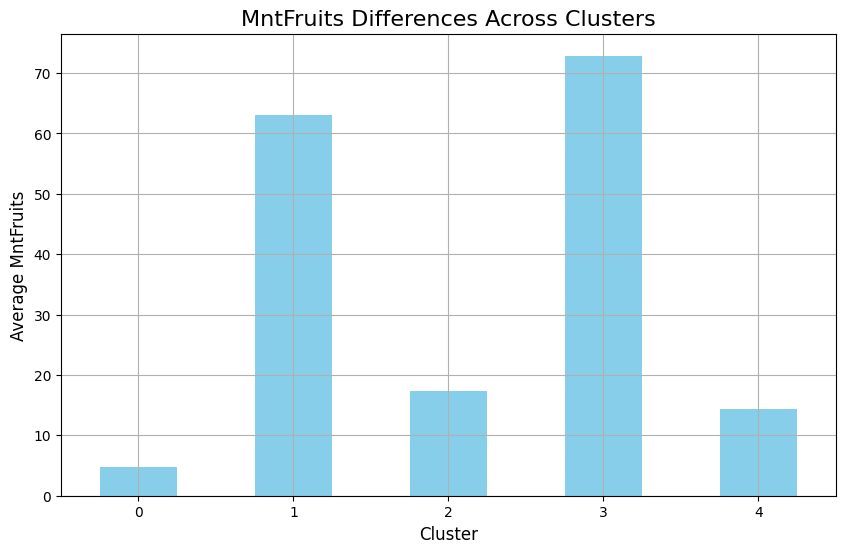

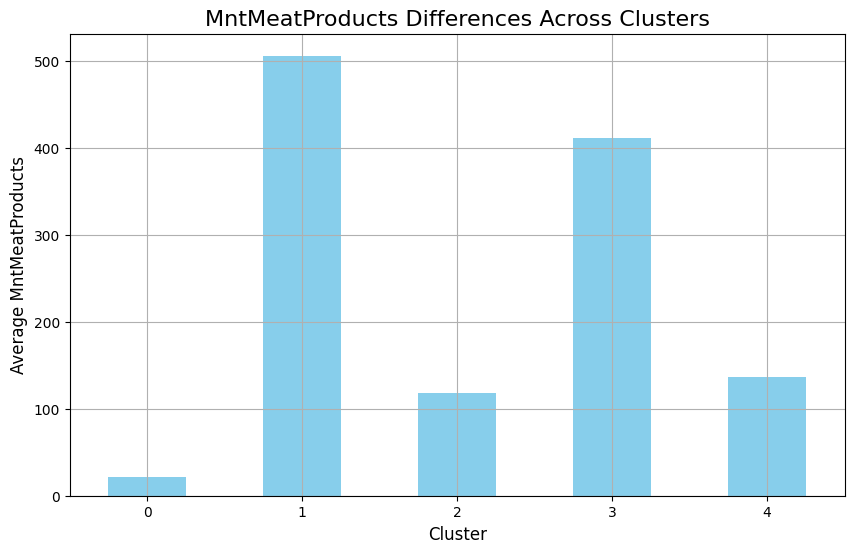

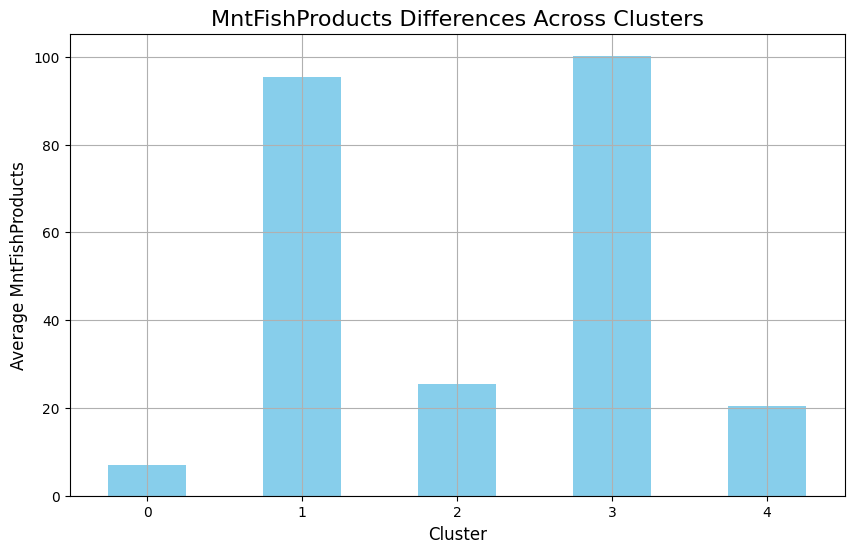

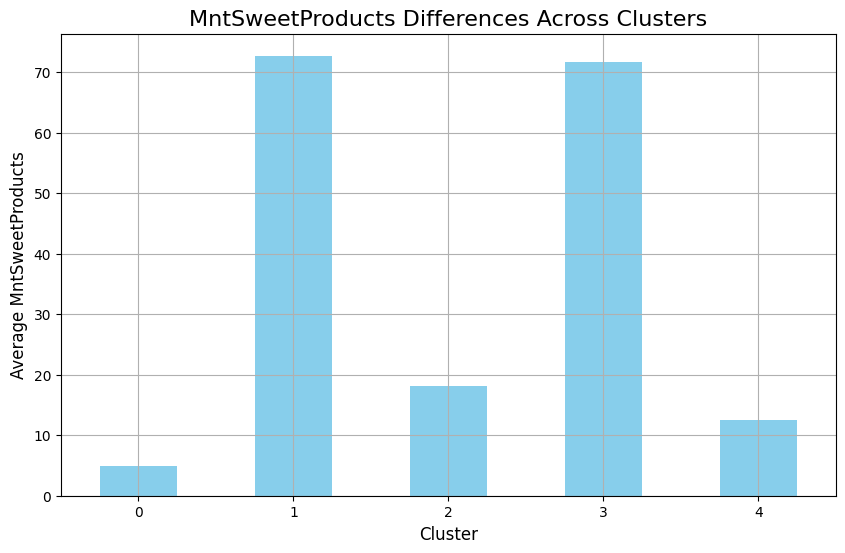

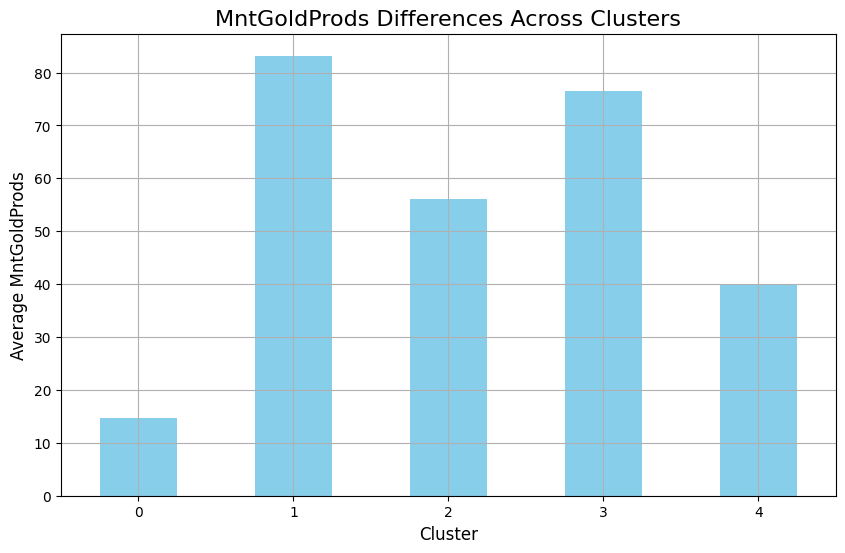

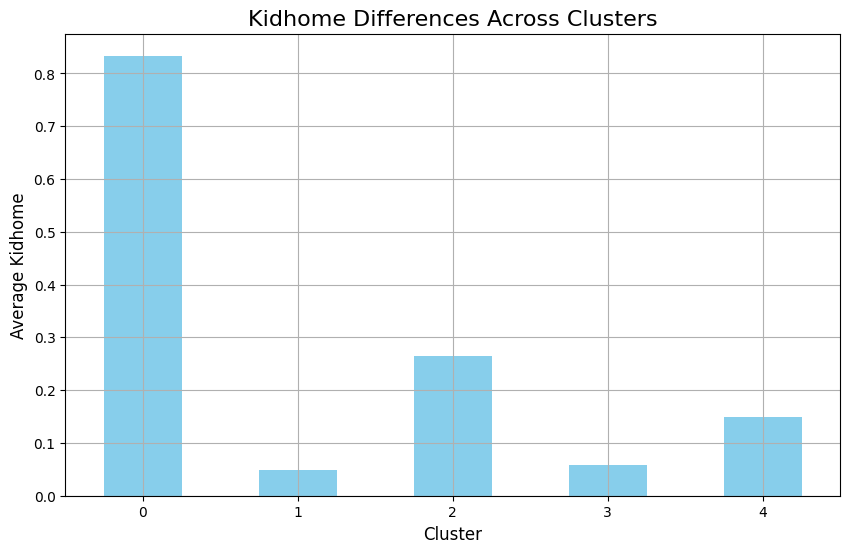

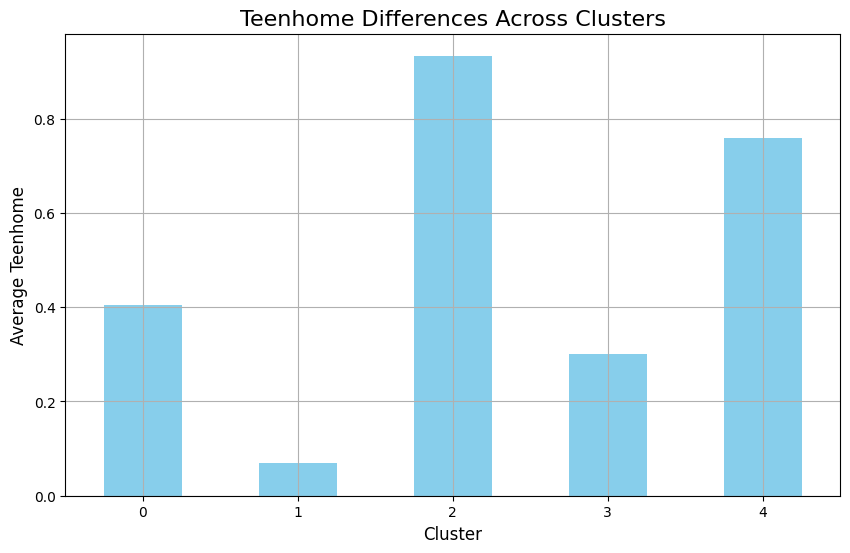

In [5]:
# Calculate the mean of all important features by cluster
cluster_means = df.groupby('Cluster').mean()

# List of important features to check
important_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                      'Kidhome', 'Teenhome']

# Create a dataframe with the means of these features across clusters
cluster_means_filtered = cluster_means[important_features]

# Calculate the variance for each feature across clusters
variance_per_feature = cluster_means_filtered.var()

# Set a threshold to consider a feature as significantly different (arbitrarily set to 10% variance)
significant_threshold = 0.1 * cluster_means_filtered.mean()

# Check and plot only the features with meaningful differences
for feature in important_features:
    if variance_per_feature[feature] > significant_threshold[feature]:
        # Plotting the feature
        plt.figure(figsize=(10, 6))
        cluster_means_filtered[feature].plot(kind='bar', color='skyblue')
        plt.title(f'{feature} Differences Across Clusters', fontsize=16)
        plt.xlabel('Cluster', fontsize=12)
        plt.ylabel(f'Average {feature}', fontsize=12)
        plt.xticks(rotation=0)
        plt.grid(True)
        plt.show()
    else:
        print(f'There is no remarkable difference between clusters on the feature: {feature}.')


In [6]:
significant_threshold = 0.1 * cluster_means_filtered.mean()
cluster_means_filtered.mean()


Income              61706.897537
MntWines              476.007556
MntFruits              34.485406
MntMeatProducts       238.797138
MntFishProducts        49.702110
MntSweetProducts       35.983355
MntGoldProds           54.088209
Kidhome                 0.270916
Teenhome                0.493230
dtype: float64

In [7]:
# Calculate the mean of all important features by cluster
cluster_means = df.groupby('Cluster').mean()

# Calculate the overall mean for comparison
overall_mean = df.mean()

# List of important features
important_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                      'Kidhome', 'Teenhome']

# Find which features are high or low for each cluster compared to the overall mean
for cluster in range(5):
    print(f"\n### Cluster {cluster} Characteristics ###")
    
    cluster_data = cluster_means.loc[cluster]
    
    # Loop over each feature to check if it's significantly higher or lower than the overall mean
    for feature in important_features:
        cluster_value = cluster_data[feature]
        overall_value = overall_mean[feature]
        
        # Calculate the percentage difference compared to the overall mean
        percentage_diff = ((cluster_value - overall_value) / overall_value) * 100
        
        # Print out the meaningful differences (e.g., if the difference is more than ±10%)
        if percentage_diff > 10:
            print(f"- {feature} is {percentage_diff:.2f}% higher than the overall average.")
        elif percentage_diff < -10:
            print(f"- {feature} is {abs(percentage_diff):.2f}% lower than the overall average.")
        else:
            print(f"- {feature} is close to the overall average.")

    print("\n")




### Cluster 0 Characteristics ###
- Income is 35.86% lower than the overall average.
- MntWines is 88.99% lower than the overall average.
- MntFruits is 81.96% lower than the overall average.
- MntMeatProducts is 87.25% lower than the overall average.
- MntFishProducts is 81.59% lower than the overall average.
- MntSweetProducts is 81.92% lower than the overall average.
- MntGoldProds is 66.62% lower than the overall average.
- Kidhome is 88.65% higher than the overall average.
- Teenhome is 19.94% lower than the overall average.



### Cluster 1 Characteristics ###
- Income is 63.03% higher than the overall average.
- MntWines is 155.83% higher than the overall average.
- MntFruits is 139.51% higher than the overall average.
- MntMeatProducts is 202.68% higher than the overall average.
- MntFishProducts is 154.19% higher than the overall average.
- MntSweetProducts is 168.48% higher than the overall average.
- MntGoldProds is 89.72% higher than the overall average.
- Kidhome is 89.11

In [31]:
cluster_means = df.groupby('Cluster').mean()

# Calculate the overall mean for comparison
overall_mean = df.mean()

# List of important features
important_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                      'Kidhome', 'Teenhome']

# Find which features are high or low for each cluster compared to the overall mean
for cluster in range(5):
    print(f"\n### Cluster {cluster} Characteristics ###")
    
    cluster_data = cluster_means.loc[cluster]
    
    # Loop over each feature to check if it's significantly higher or lower than the overall mean
    for feature in important_features:
        cluster_value = cluster_data[feature]
        overall_value = overall_mean[feature]
        
        # Calculate the percentage difference compared to the overall mean
        percentage_diff = ((cluster_value - overall_value) / overall_value) * 100
        
        # Print out the differences along with actual values
        if percentage_diff > 10:
            print(f"- {feature} is ${cluster_value:.2f}, which is {percentage_diff:.2f}% higher than the overall average of ${overall_value:.2f}.")
        elif percentage_diff < -10:
            print(f"- {feature} is ${cluster_value:.2f}, which is {abs(percentage_diff):.2f}% lower than the overall average of ${overall_value:.2f}.")
        else:
            print(f"- {feature} is ${cluster_value:.2f}, which is close to the overall average of ${overall_value:.2f}.")

    print("\n")



### Cluster 0 Characteristics ###
- Income is $33507.28, which is 35.86% lower than the overall average of $52243.98.
- MntWines is $33.59, which is 88.99% lower than the overall average of $305.19.
- MntFruits is $4.75, which is 81.96% lower than the overall average of $26.35.
- MntMeatProducts is $21.31, which is 87.25% lower than the overall average of $167.16.
- MntFishProducts is $6.92, which is 81.59% lower than the overall average of $37.56.
- MntSweetProducts is $4.89, which is 81.92% lower than the overall average of $27.07.
- MntGoldProds is $14.64, which is 66.62% lower than the overall average of $43.85.
- Kidhome is $0.83, which is 88.65% higher than the overall average of $0.44.
- Teenhome is $0.40, which is 19.94% lower than the overall average of $0.51.



### Cluster 1 Characteristics ###
- Income is $85174.54, which is 63.03% higher than the overall average of $52243.98.
- MntWines is $780.79, which is 155.83% higher than the overall average of $305.19.
- MntFruits i

In [8]:
# Calculate the mean of all important features by cluster
cluster_means = df.groupby('Cluster').mean()

# Calculate the overall mean for comparison
overall_mean = df.mean()

# List of important features
important_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                      'Kidhome', 'Teenhome']

# Find which features are high or low for each cluster compared to the overall mean
for cluster in range(5):
    print(f"\n### Cluster {cluster} Characteristics ###")
    
    cluster_data = cluster_means.loc[cluster]
    
    # Loop over each feature to check if it's significantly higher or lower than the overall mean
    for feature in important_features:
        cluster_value = round(cluster_data[feature])
        overall_value = round(overall_mean[feature])
        
        try:
            # Calculate the percentage difference compared to the overall mean
            percentage_diff = ((cluster_value - overall_value) / (overall_value+0.00001)) * 100
            
            # Format numbers with commas for values larger than 100
            cluster_value_str = f"{cluster_value:,}"
            overall_value_str = f"{overall_value:,}"
            
            # Print out the differences along with actual values
            if percentage_diff > 10:
                print(f"- {feature} is ${cluster_value_str}, which is {percentage_diff:.2f}% higher than the overall average of ${overall_value_str}.")
            elif percentage_diff < -10:
                print(f"- {feature} is ${cluster_value_str}, which is {abs(percentage_diff):.2f}% lower than the overall average of ${overall_value_str}.")
            else:
                print(f"- {feature} is ${cluster_value_str}, which is close to the overall average of ${overall_value_str}.")
        except:
            print(feature, 'float division by 0 error')
    print("\n")




### Cluster 0 Characteristics ###
- Income is $33,507, which is 35.86% lower than the overall average of $52,244.
- MntWines is $34, which is 88.85% lower than the overall average of $305.
- MntFruits is $5, which is 80.77% lower than the overall average of $26.
- MntMeatProducts is $21, which is 87.43% lower than the overall average of $167.
- MntFishProducts is $7, which is 81.58% lower than the overall average of $38.
- MntSweetProducts is $5, which is 81.48% lower than the overall average of $27.
- MntGoldProds is $15, which is 65.91% lower than the overall average of $44.
- Kidhome is $1, which is 10000000.00% higher than the overall average of $0.
- Teenhome is $0, which is 100.00% lower than the overall average of $1.



### Cluster 1 Characteristics ###
- Income is $85,175, which is 63.03% higher than the overall average of $52,244.
- MntWines is $781, which is 156.07% higher than the overall average of $305.
- MntFruits is $63, which is 142.31% higher than the overall average

In [9]:
# Calculate the mean of all important features by cluster
cluster_means = df.groupby('Cluster').mean()

# Calculate the overall mean for comparison
overall_mean = df.mean()

# List of important features to analyze
important_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                      'Kidhome', 'Teenhome']

# Function to format numbers with commas
def format_num(value):
    return f"{value:,.0f}"

# Function to analyze and print insights for each cluster
def analyze_cluster_differences():
    for cluster in range(5):
        print(f"\n### Cluster {cluster} Characteristics ###")
        
        cluster_data = cluster_means.loc[cluster]
        
        # Loop over each feature to analyze significant differences
        for feature in important_features:
            cluster_value = round(cluster_data[feature])
            overall_value = round(overall_mean[feature])
            
            # Calculate the percentage difference compared to the overall mean
            percentage_diff = ((cluster_value - overall_value) / (overall_value+0.0001)) * 100
            
            # Format numbers with commas for better readability
            cluster_value_str = format_num(cluster_value)
            overall_value_str = format_num(overall_value)
            
            # Only print differences greater than 10% for meaningful insights
            if percentage_diff > 10:
                print(f"- {feature} is ${cluster_value_str}, which is {percentage_diff:.2f}% higher than the overall average of ${overall_value_str}.")
            elif percentage_diff < -10:
                print(f"- {feature} is ${cluster_value_str}, which is {abs(percentage_diff):.2f}% lower than the overall average of ${overall_value_str}.")
        
        # Print an overall summary for each cluster based on insights
        summarize_cluster(cluster, cluster_data)

# Function to provide business insight summaries based on cluster characteristics
def summarize_cluster(cluster, cluster_data):
    income = cluster_data['Income']
    wine_spending = cluster_data['MntWines']
    family_size = cluster_data['Kidhome'] + cluster_data['Teenhome']
    
    if income > overall_mean['Income'] and wine_spending > overall_mean['MntWines']:
        print("\n**Business Recommendation:** Focus on luxury products and exclusive marketing for these high-income, wine-loving customers.")
    elif income < overall_mean['Income'] and family_size > overall_mean['Kidhome'] + overall_mean['Teenhome']:
        print("\n**Business Recommendation:** Target this budget-conscious, family-oriented segment with discounted bundles and promotions on essential products.")
    elif income > overall_mean['Income'] and family_size == 0:
        print("\n**Business Recommendation:** These high-income, older customers are big spenders on luxury goods. Focus on high-margin products and loyalty programs.")
    elif income < overall_mean['Income'] and family_size == 0:
        print("\n**Business Recommendation:** Offer deep discounts and bulk promotions to attract this price-sensitive group, focusing on essentials.")
    else:
        print("\n**Business Recommendation:** This balanced segment responds well to general campaigns. Continue offering a variety of standard promotions.")

# Call the function to analyze and print insights for each cluster
analyze_cluster_differences()




### Cluster 0 Characteristics ###
- Income is $33,507, which is 35.86% lower than the overall average of $52,244.
- MntWines is $34, which is 88.85% lower than the overall average of $305.
- MntFruits is $5, which is 80.77% lower than the overall average of $26.
- MntMeatProducts is $21, which is 87.43% lower than the overall average of $167.
- MntFishProducts is $7, which is 81.58% lower than the overall average of $38.
- MntSweetProducts is $5, which is 81.48% lower than the overall average of $27.
- MntGoldProds is $15, which is 65.91% lower than the overall average of $44.
- Kidhome is $1, which is 1000000.00% higher than the overall average of $0.
- Teenhome is $0, which is 99.99% lower than the overall average of $1.

**Business Recommendation:** Target this budget-conscious, family-oriented segment with discounted bundles and promotions on essential products.

### Cluster 1 Characteristics ###
- Income is $85,175, which is 63.03% higher than the overall average of $52,244.
- Mn

As a **hardcore stats specialist**, the goal is to conduct a rigorous analysis that goes beyond simple averages and percentages. The focus would be on ensuring that the differences between clusters are statistically significant and meaningful, and not due to random variation. Here’s a breakdown of what I would do and why, along with the steps to extract statistically robust insights from the dataset:

### 1. **Hypothesis Testing for Statistical Significance**
   - **Objective:** Validate that the differences in means for various features across clusters are statistically significant (i.e., not due to random chance).
   - **Method:** Perform **ANOVA (Analysis of Variance)** for each feature to compare the means across clusters and assess whether the observed differences are statistically significant.
   - **Why:** This ensures that when we say "Cluster 1 spends more on wine than the other clusters," it's not just due to random variation, but a true, statistically significant difference.

   **Steps:**
   - Perform **One-Way ANOVA** for each feature across the clusters to check if at least one cluster differs significantly from the others.
   - If ANOVA is significant, perform **post-hoc tests** (Tukey's HSD) to determine which clusters differ from each other.
   
   **Python Code for ANOVA:**
   ```python
   import scipy.stats as stats
   from statsmodels.stats.multicomp import pairwise_tukeyhsd

   # Perform ANOVA for each feature
   for feature in important_features:
       f_val, p_val = stats.f_oneway(
           df[df['Cluster'] == 0][feature],
           df[df['Cluster'] == 1][feature],
           df[df['Cluster'] == 2][feature],
           df[df['Cluster'] == 3][feature],
           df[df['Cluster'] == 4][feature]
       )
       print(f"ANOVA for {feature}: F-statistic = {f_val:.2f}, p-value = {p_val:.4f}")

       # If p-value < 0.05, the differences are statistically significant
       if p_val < 0.05:
           print(f"{feature} shows statistically significant differences across clusters.")
           
           # Perform Tukey's post-hoc test if ANOVA is significant
           tukey = pairwise_tukeyhsd(endog=df[feature], groups=df['Cluster'], alpha=0.05)
           print(tukey.summary())
   ```

   **Interpretation:**
   - If the **p-value** from ANOVA is below 0.05, this indicates that at least one cluster's mean is significantly different from the others.
   - Tukey’s post-hoc test will tell us **which specific clusters** are significantly different from one another.

---

### 2. **Feature Importance via Machine Learning Models**
   - **Objective:** Identify the most important features that distinguish clusters using data-driven methods.
   - **Method:** Use a **decision tree classifier** or a **random forest classifier** to predict cluster membership based on the features. By examining the feature importance, we can identify which features (e.g., income, product spending) are most influential in driving the differences between clusters.
   - **Why:** While traditional statistics like ANOVA are useful, decision trees and random forests allow us to model non-linear relationships and interactions between features, providing a more nuanced understanding of what defines each cluster.

   **Python Code for Feature Importance:**
   ```python
   from sklearn.ensemble import RandomForestClassifier
   import numpy as np

   # Train a random forest classifier to predict clusters
   rf = RandomForestClassifier(n_estimators=100, random_state=42)
   X = df[important_features]
   y = df['Cluster']
   rf.fit(X, y)

   # Get feature importance
   feature_importances = rf.feature_importances_
   indices = np.argsort(feature_importances)[::-1]

   # Print feature importance in descending order
   print("Feature importances:")
   for i in indices:
       print(f"{important_features[i]}: {feature_importances[i]:.4f}")
   ```

   **Interpretation:**
   - **High feature importance** indicates which variables are most influential in distinguishing the clusters.
   - For example, if **Income** and **MntWines** have the highest feature importance, we know that income level and wine spending are key differentiators between clusters.

---

### 3. **Effect Size Calculation (Cohen's d)**
   - **Objective:** Quantify the magnitude of the differences between clusters in terms of **effect size**, beyond statistical significance.
   - **Method:** Use **Cohen’s d** to measure the size of the difference between means of two clusters.
   - **Why:** Statistical significance tells us whether the differences are real, but **effect size** tells us **how large** the differences are, helping us focus on the most meaningful and impactful distinctions between clusters.

   **Python Code for Cohen’s d:**
   ```python
   def cohens_d(group1, group2):
       mean1, mean2 = np.mean(group1), np.mean(group2)
       pooled_std = np.sqrt((np.std(group1, ddof=1) ** 2 + np.std(group2, ddof=1) ** 2) / 2)
       return (mean1 - mean2) / pooled_std

   # Calculate Cohen's d for each feature between pairs of clusters
   for feature in important_features:
       for i in range(5):
           for j in range(i + 1, 5):
               d = cohens_d(df[df['Cluster'] == i][feature], df[df['Cluster'] == j][feature])
               print(f"Cohen's d for {feature} between Cluster {i} and Cluster {j}: {d:.2f}")
   ```

   **Interpretation:**
   - A **Cohen's d** value of 0.2 represents a small effect size, 0.5 represents a medium effect size, and 0.8 or higher represents a large effect size.
   - For example, if **Cohen’s d** for **MntWines** between Cluster 0 and Cluster 2 is 1.2, this suggests a **very large difference** in wine spending between these two clusters.

---

### 4. **Multivariate Analysis (Principal Component Analysis - PCA)**
   - **Objective:** Reduce dimensionality to visualize the differences between clusters and understand the key drivers of cluster membership.
   - **Method:** Perform **PCA** to reduce the dataset to 2 or 3 principal components, then plot the clusters in this reduced space.
   - **Why:** PCA helps uncover the underlying structure in the data, allowing us to visualize which features contribute most to cluster separation.

   **Python Code for PCA:**
   ```python
   from sklearn.decomposition import PCA
   import matplotlib.pyplot as plt

   # Perform PCA to reduce data to 2 components
   pca = PCA(n_components=2)
   df_pca = pca.fit_transform(df[important_features])

   # Plot the clusters in the reduced PCA space
   plt.figure(figsize=(8,6))
   plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
   plt.title('Clusters in PCA Space')
   plt.xlabel('Principal Component 1')
   plt.ylabel('Principal Component 2')
   plt.colorbar(label='Cluster')
   plt.show()
   ```

   **Interpretation:**
   - The **PCA plot** allows us to visualize how well-separated the clusters are in lower-dimensional space.
   - By examining the **loadings** of each feature on the principal components, we can identify the features most responsible for separating the clusters.

---

### 5. **Interpretable Models: Logistic Regression with Regularization**
   - **Objective:** Build a **logistic regression model with regularization** (L1 or L2) to understand the **linear relationships** between features and cluster membership.
   - **Why:** Logistic regression provides an interpretable way to quantify how features are associated with specific clusters. Regularization helps by removing irrelevant features and improving the model's focus on the most important variables.

---

### **Summary of Steps:**
1. **Statistical Testing (ANOVA & Post-hoc)**: To verify significant differences between clusters.
2. **Machine Learning Feature Importance**: To rank features by their importance in distinguishing clusters.
3. **Effect Size (Cohen’s d)**: To quantify the magnitude of differences between clusters.
4. **Multivariate Analysis (PCA)**: To visualize clusters in reduced space and identify key drivers.
5. **Interpretable Models (Logistic Regression)**: To build a simple model that helps stakeholders understand how each feature impacts cluster membership.

This comprehensive approach ensures that we extract **statistically valid** and **meaningfully large** differences between clusters, providing clear, actionable insights for stakeholders.

ANOVA for Income: F-statistic = 571.97, p-value = 0.0000
Income shows statistically significant differences across clusters.
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower       upper    reject
---------------------------------------------------------------
     0      1  51667.2616    0.0  47804.3043  55530.2188   True
     0      2  22193.6108    0.0  19590.8036  24796.4179   True
     0      3  38423.0595    0.0  35597.8099  41248.3091   True
     0      4  28714.1631    0.0  24037.8409  33390.4853   True
     1      2 -29473.6508    0.0 -33564.0968 -25383.2048   True
     1      3  -13244.202    0.0 -17479.6688  -9008.7353   True
     1      4 -22953.0984    0.0 -28594.4753 -17311.7216   True
     2      3  16229.4488    0.0  13100.3363  19358.5613   True
     2      4   6520.5524 0.0024   1654.6199  11386.4848   True
     3      4  -9708.8964    0.0  -14697.356  -4720.4368   True
-------------------------------------------

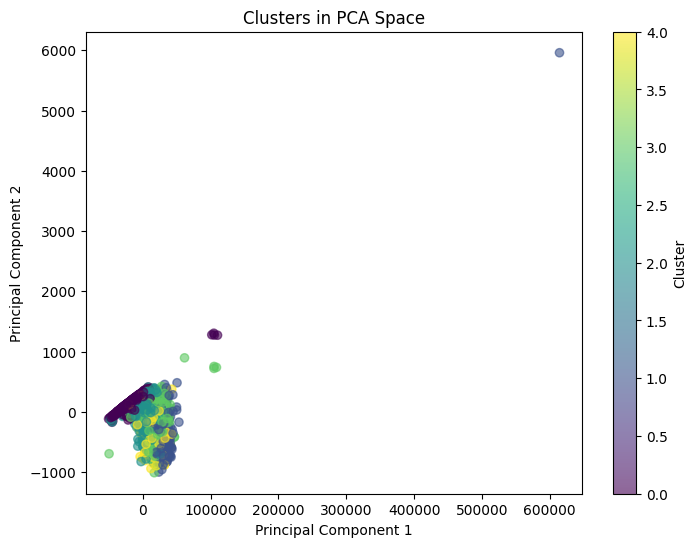

In [10]:
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


# Perform ANOVA for each feature
for feature in important_features:
    f_val, p_val = stats.f_oneway(
        df[df['Cluster'] == 0][feature],
        df[df['Cluster'] == 1][feature],
        df[df['Cluster'] == 2][feature],
        df[df['Cluster'] == 3][feature],
        df[df['Cluster'] == 4][feature]
    )
    print(f"ANOVA for {feature}: F-statistic = {f_val:.2f}, p-value = {p_val:.4f}")

    # If p-value < 0.05, the differences are statistically significant
    if p_val < 0.05:
        print(f"{feature} shows statistically significant differences across clusters.")
        
        # Perform Tukey's post-hoc test if ANOVA is significant
        tukey = pairwise_tukeyhsd(endog=df[feature], groups=df['Cluster'], alpha=0.05)
        print(tukey.summary())




### COHENS D

def cohens_d(group1, group2):
    mean1, mean2 = np.mean(group1), np.mean(group2)
    pooled_std = np.sqrt((np.std(group1, ddof=1) ** 2 + np.std(group2, ddof=1) ** 2) / 2)
    return (mean1 - mean2) / pooled_std

# Calculate Cohen's d for each feature between pairs of clusters
for feature in important_features:
    for i in range(5):
        for j in range(i + 1, 5):
            d = cohens_d(df[df['Cluster'] == i][feature], df[df['Cluster'] == j][feature])
            print(f"Cohen's d for {feature} between Cluster {i} and Cluster {j}: {d:.2f}")



from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
# Perform PCA to reduce data to 2 components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[important_features])

# Plot the clusters in the reduced PCA space
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Clusters in PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()



In [11]:
# Calculate the mean of all features by cluster
cluster_means = df.groupby('Cluster').mean()

# Overall mean for comparison
overall_mean = df.mean()

# Focus on MntMeatProducts (spending on meat products)
meat_spending_by_cluster = cluster_means['MntMeatProducts']
overall_meat_spending = overall_mean['MntMeatProducts']

# Rank clusters by meat product spending
ranked_clusters = meat_spending_by_cluster.sort_values(ascending=False)

# Function to format numbers with commas
def format_num(value):
    return f"{value:,.0f}"

# Function to calculate 90% range for a feature within a cluster
def calculate_range(df, cluster, feature):
    data = df[df['Cluster'] == cluster][feature]
    lower_bound = np.percentile(data, 10)
    upper_bound = np.percentile(data, 90)
    return format_num(round(lower_bound)), format_num(round(upper_bound))

# Function to provide insights for the meat product manager
def analyze_meat_spending():
    # Top cluster spending the most on meat
    top_cluster = ranked_clusters.index[0]
    top_cluster_spending = meat_spending_by_cluster[top_cluster]
    
    # Bottom cluster spending the least on meat
    bottom_cluster = ranked_clusters.index[-1]
    bottom_cluster_spending = meat_spending_by_cluster[bottom_cluster]
    
    print(f"### Meat Product Spending Analysis ###\n")
    
    # Top cluster analysis
    print(f"**Cluster {top_cluster} spends the most on meat products.**")
    print(f"- Average spending on meat: ${format_num(round(top_cluster_spending))} (compared to overall average of ${format_num(round(overall_meat_spending))}).")
    top_cluster_data = cluster_means.loc[top_cluster]
    describe_cluster(top_cluster_data, top_cluster)
    
    # Bottom cluster analysis
    print(f"\n**Cluster {bottom_cluster} spends the least on meat products.**")
    print(f"- Average spending on meat: ${format_num(round(bottom_cluster_spending))} (compared to overall average of ${format_num(round(overall_meat_spending))}).")
    bottom_cluster_data = cluster_means.loc[bottom_cluster]
    describe_cluster(bottom_cluster_data, bottom_cluster)

# Function to describe key characteristics of a cluster, including ranges
def describe_cluster(cluster_data, cluster):
    income = cluster_data['Income']
    wine_spending = cluster_data['MntWines']
    family_size = cluster_data['Kidhome'] + cluster_data['Teenhome']
    
    # Calculate income range for 90% of the cluster
    income_range = calculate_range(df, cluster, 'Income')
    
    print(f"- Income: ${format_num(round(income))} (90% of this cluster probably makes between ${income_range[0]} and ${income_range[1]}).")
    print(f"- Wine Spending: ${format_num(round(wine_spending))}")
    print(f"- Family Size: {round(family_size)} children")
    
    if income > overall_mean['Income']:
        print(f"- This cluster has above-average income.")
    if wine_spending > overall_mean['MntWines']:
        print(f"- This cluster spends above average on wine.")
    if family_size > overall_mean['Kidhome'] + overall_mean['Teenhome']:
        print(f"- This cluster has larger families.")
    else:
        print(f"- This cluster has smaller or no families.")

# Call the function to analyze meat product spending
analyze_meat_spending()



### Meat Product Spending Analysis ###

**Cluster 1 spends the most on meat products.**
- Average spending on meat: $506 (compared to overall average of $167).
- Income: $85,175 (90% of this cluster probably makes between $72,635 and $92,403).
- Wine Spending: $781
- Family Size: 0 children
- This cluster has above-average income.
- This cluster spends above average on wine.
- This cluster has smaller or no families.

**Cluster 0 spends the least on meat products.**
- Average spending on meat: $21 (compared to overall average of $167).
- Income: $33,507 (90% of this cluster probably makes between $18,452 and $47,936).
- Wine Spending: $34
- Family Size: 1 children
- This cluster has larger families.


In [56]:
# Calculate the mean of all features by cluster
cluster_means = df.groupby('Cluster').mean()

# Overall mean for comparison
overall_mean = df.mean()

# List of important features to analyze
important_features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
                      'Kidhome', 'Teenhome']

# Function to format numbers with commas
def format_num(value):
    return f"{value:,.0f}"

# Function to calculate 90% range for a feature within a cluster
def calculate_range(df, cluster, feature):
    data = df[df['Cluster'] == cluster][feature]
    lower_bound = np.percentile(data, 10)
    upper_bound = np.percentile(data, 90)
    return format_num(round(lower_bound)), format_num(round(upper_bound))

# Function to find the cluster rank for each feature to determine significance
def cluster_rankings(feature):
    rankings = cluster_means[feature].rank()
    return rankings

# Function to provide insights for the feature manager
def analyze_cluster_spending():
    print(f"### Cluster Spending Analysis ###\n")
    
    # Loop through each cluster to analyze
    for cluster in range(5):
        print(f"**Cluster {cluster} Analysis:**\n")
        
        # Get data for this cluster
        cluster_data = cluster_means.loc[cluster]
        
        # Describe the cluster by looking at each feature
        describe_cluster(cluster_data, cluster)

# Function to describe key characteristics of a cluster, printing all features
def describe_cluster(cluster_data, cluster):
    significant_features = []
    
    # Loop through each important feature
    for feature in important_features:
        cluster_value = cluster_data[feature]
        overall_value = overall_mean[feature]
        
        # Calculate percentage difference compared to overall average
        percentage_diff = ((cluster_value - overall_value) / overall_value) * 100
        
        # Get the 90% range for this feature in the cluster
        range_values = calculate_range(df, cluster, feature)
        
        # Print all features with ranges
        cluster_value_str = format_num(round(cluster_value))
        overall_value_str = format_num(round(overall_value))
        print(f"- {feature} is ${cluster_value_str} (90% of this cluster probably falls between ${range_values[0]} and ${range_values[1]}).")

        # Rank this cluster in terms of spending on this feature
        rankings = cluster_rankings(feature)
        cluster_rank = rankings[cluster]

        # If there's a significant difference (> 10%), add it to the summary
        if abs(percentage_diff) > 10:
            rank_descriptor = "higher" if percentage_diff > 0 else "lower"
            significant_features.append(f"{feature} is {abs(percentage_diff):.2f}% {rank_descriptor} than the overall average.")
    
    # Print the summary based on significant features
    summarize_cluster(cluster, cluster_data, significant_features)
    print("\n")

# Function to summarize each cluster based on significant features
def summarize_cluster(cluster, cluster_data, significant_features):
    if significant_features:
        print(f"**Summary for Cluster {cluster}:**")
        for feature in significant_features:
            print(f"- {feature}")
    else:
        print(f"**Summary for Cluster {cluster}:** No significant differences in key features.")

    # Generate key takeaways for the cluster
    generate_key_takeaways(cluster, cluster_data)
    print("\n")

# Function to generate key takeaways based on significant features
def generate_key_takeaways(cluster, cluster_data):
    print(f"**Key Takeaways for Cluster {cluster}:**")
    
    if cluster_data['Income'] > overall_mean['Income']:
        print("- This cluster has above-average income.")
    elif cluster_data['Income'] < overall_mean['Income']:
        print("- This cluster has below-average income.")
    
    if cluster_data['MntMeatProducts'] > overall_mean['MntMeatProducts']:
        print("- This cluster spends significantly more on meat products.")
    elif cluster_data['MntMeatProducts'] < overall_mean['MntMeatProducts']:
        print("- This cluster spends significantly less on meat products.")
    
    if cluster_data['MntWines'] > overall_mean['MntWines']:
        print("- This cluster spends significantly more on wine.")
    elif cluster_data['MntWines'] < overall_mean['MntWines']:
        print("- This cluster spends significantly less on wine.")
    
    if cluster_data['Kidhome'] + cluster_data['Teenhome'] > overall_mean['Kidhome'] + overall_mean['Teenhome']:
        print("- This cluster has larger families.")
    elif cluster_data['Kidhome'] + cluster_data['Teenhome'] < overall_mean['Kidhome'] + overall_mean['Teenhome']:
        print("- This cluster has smaller families or no children.")

# Call the function to analyze all clusters
analyze_cluster_spending()



### Cluster Spending Analysis ###

**Cluster 0 Analysis:**

- Income is $33,507 (90% of this cluster probably falls between $18,452 and $47,936).
- MntWines is $34 (90% of this cluster probably falls between $3 and $85).
- MntFruits is $5 (90% of this cluster probably falls between $0 and $12).
- MntMeatProducts is $21 (90% of this cluster probably falls between $4 and $52).
- MntFishProducts is $7 (90% of this cluster probably falls between $0 and $17).
- MntSweetProducts is $5 (90% of this cluster probably falls between $0 and $13).
- MntGoldProds is $15 (90% of this cluster probably falls between $1 and $33).
- Kidhome is $1 (90% of this cluster probably falls between $0 and $1).
- Teenhome is $0 (90% of this cluster probably falls between $0 and $1).
**Summary for Cluster 0:**
- Income is 35.86% lower than the overall average.
- MntWines is 88.99% lower than the overall average.
- MntFruits is 81.96% lower than the overall average.
- MntMeatProducts is 87.25% lower than the overall

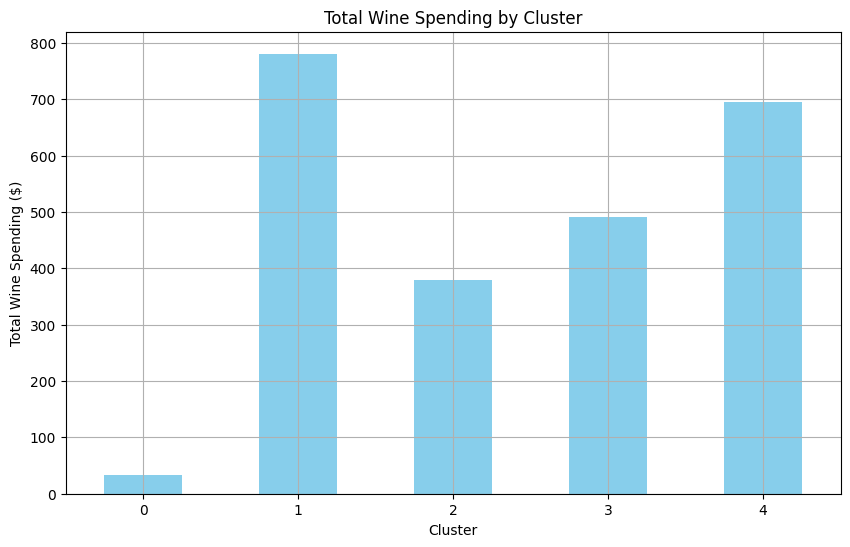

In [12]:
# Aggregate the total spending on wine by each cluster
wine_spending_per_cluster = df.groupby('Cluster')['MntWines'].mean()

# Bar plot to visualize wine spending per cluster
plt.figure(figsize=(10, 6))
wine_spending_per_cluster.plot(kind='bar', color='skyblue')
plt.title('Total Wine Spending by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total Wine Spending ($)')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

# You can repeat similar plots for other product categories like MntFruits, MntMeatProducts, etc.


/var/folders/yb/hf5hzk391w9157dctx7yzyn80000gn/T/ipykernel_14964/1147646279.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='MntWines', data=df, palette='Set2')


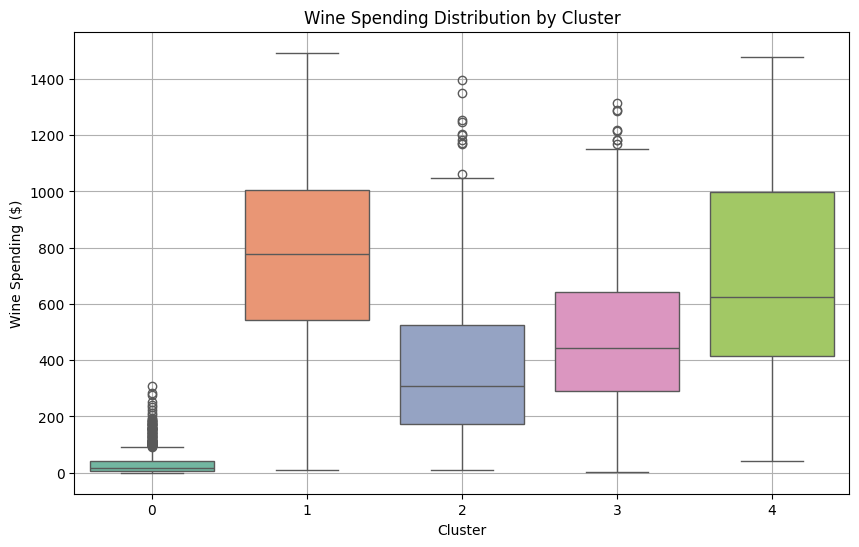

In [13]:
# Box plot for wine spending by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='MntWines', data=df, palette='Set2')
plt.title('Wine Spending Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Wine Spending ($)')
plt.grid(True)
plt.show()
